# Proyecto 1
# Universidad Galileo
## Ciencia de Datos en Python

### Mario Obed Morales Güitz
### 24006981

# Entorno de trabajo

## Importando las librerias que se utilizarán

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

import warnings


In [12]:
# Carga de Datos
sns.set_style("darkgrid")
d = np.load('proyecto_training_data.npy') 
df = pd.DataFrame(d)
df

,0,1,2,3,4,5
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


# Separando Información

## atasets: entrenamiento(80 %) 
## validación y pruebas(20 %).

In [13]:
Porcentaje = int(df[0].count()*.8)
Porcentaje

1168

In [14]:
Set_Entrenamiento = df.iloc[:Porcentaje]
Set_Entrenamiento = Set_Entrenamiento.set_axis(['SalePrice', 'OverallQual', '1stFLrSF','TotRmsAbvGrd', 
                            'YearBuilt', 'LotFrontage'], 
                    axis='columns')
Set_Entrenamiento

,SalePrice,OverallQual,1stFLrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1163,108959.0,4.0,1258.0,6.0,1969.0,60.0
1164,194000.0,5.0,1432.0,5.0,1978.0,NaN
1165,233170.0,7.0,1502.0,7.0,2009.0,79.0
1166,245350.0,8.0,1694.0,7.0,2008.0,64.0


In [15]:
Set_Pruebas = df.iloc[Porcentaje:]
Set_Pruebas = Set_Pruebas.set_axis(['SalePrice', 'OverallQual', '1stFLrSF','TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'], 
                                   axis='columns')
Set_Pruebas

,SalePrice,OverallQual,1stFLrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
1168,235000.0,6.0,1236.0,7.0,1935.0,120.0
1169,625000.0,10.0,1831.0,10.0,1995.0,118.0
1170,171000.0,6.0,1118.0,6.0,1977.0,76.0
1171,163000.0,6.0,1261.0,6.0,1958.0,76.0
1172,171900.0,7.0,625.0,5.0,2006.0,35.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


# Análisis Exploratorio de Datos

1. media
2. valor m´aximo
3. valor m´ınimo
4. rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1)
5. desviaci´on est´andar

In [16]:
Media = Set_Entrenamiento.mean(axis=0)
Valor_Maximo =  Set_Entrenamiento.max(axis=0)
Valor_Minimo = Set_Entrenamiento.min(axis=0)
Desviacion_Estandar = Set_Entrenamiento.std(axis=0)
Rango = Valor_Maximo - Valor_Minimo

Resultados = ({'Media':pd.Series(Media,dtype=float), 'Valor_Maximo':pd.Series(Valor_Maximo,dtype=float), 'Valor_Minimo':pd.Series(Valor_Minimo,dtype=float),
             'Desviacion_Estandar':pd.Series(Desviacion_Estandar,dtype=float), 'Rango':pd.Series(Rango)})
dfAnalisis = pd.DataFrame(Resultados)
dfAnalisis


,Media,Valor_Maximo,Valor_Minimo,Desviacion_Estandar,Rango
SalePrice,180590.277397,755000.0,34900.0,78815.697902,720100.0
OverallQual,6.101027,10.0,1.0,1.378025,9.0
1stFLrSF,1156.323630,3228.0,334.0,373.780374,2894.0
TotRmsAbvGrd,6.485445,14.0,2.0,1.609141,12.0
YearBuilt,1971.451199,2010.0,1875.0,29.951707,135.0
LotFrontage,69.946985,313.0,21.0,23.478161,292.0


In [17]:
Set_Entrenamiento.describe()

,SalePrice,OverallQual,1stFLrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,962.000000
mean,180590.277397,6.101027,1156.323630,6.485445,1971.451199,69.946985
std,78815.697902,1.378025,373.780374,1.609141,29.951707,23.478161
min,34900.000000,1.000000,334.000000,2.000000,1875.000000,21.000000
25%,129900.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,162950.000000,6.000000,1086.000000,6.000000,1973.000000,70.000000
75%,214000.000000,7.000000,1390.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,3228.000000,14.000000,2010.000000,313.000000


# Usando Seaborn para graficar

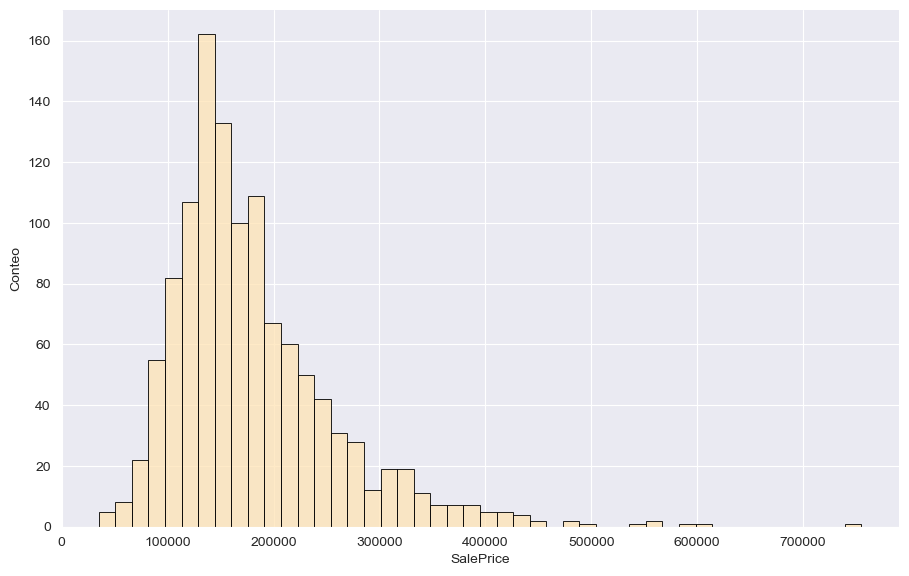

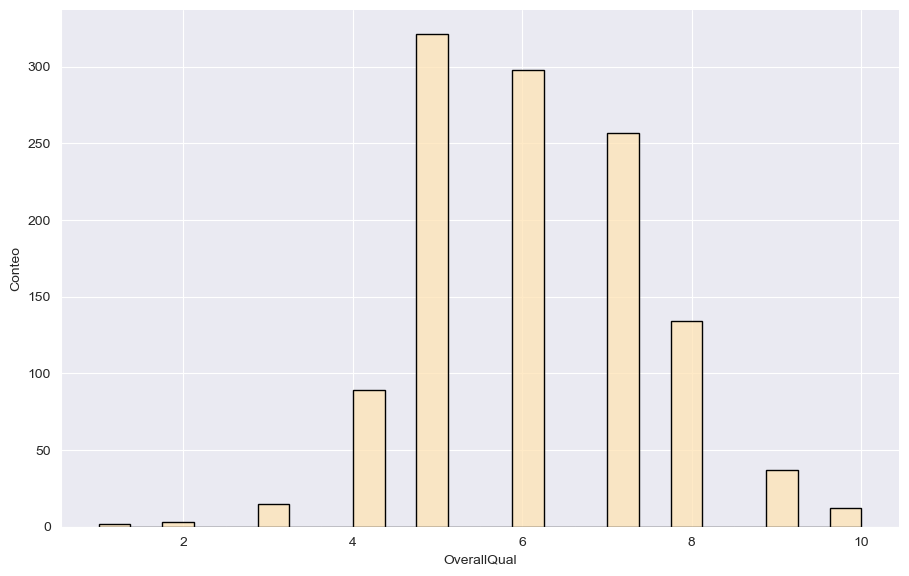

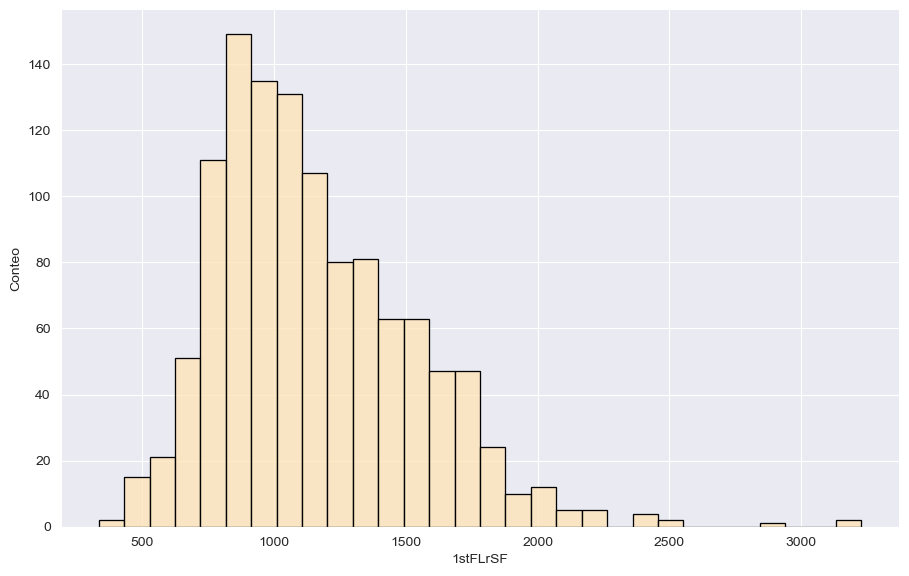

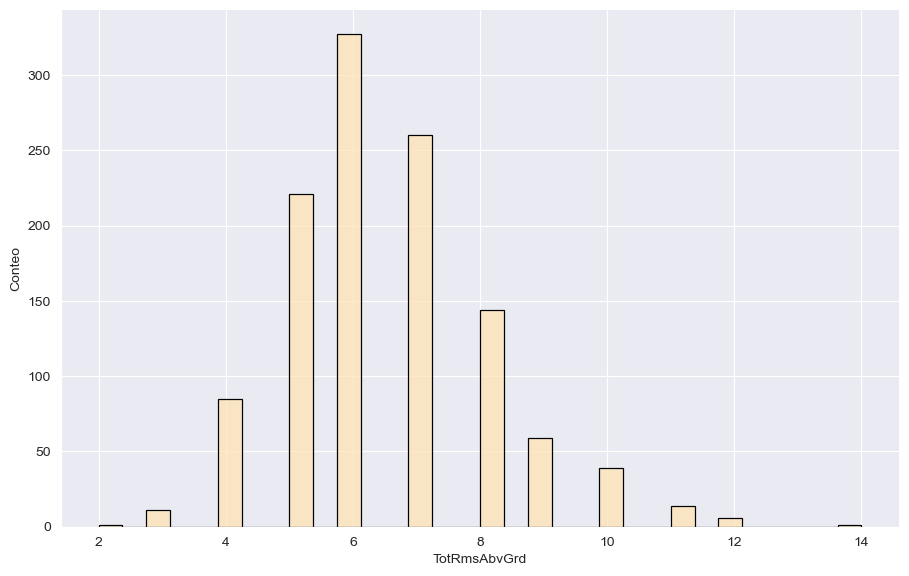

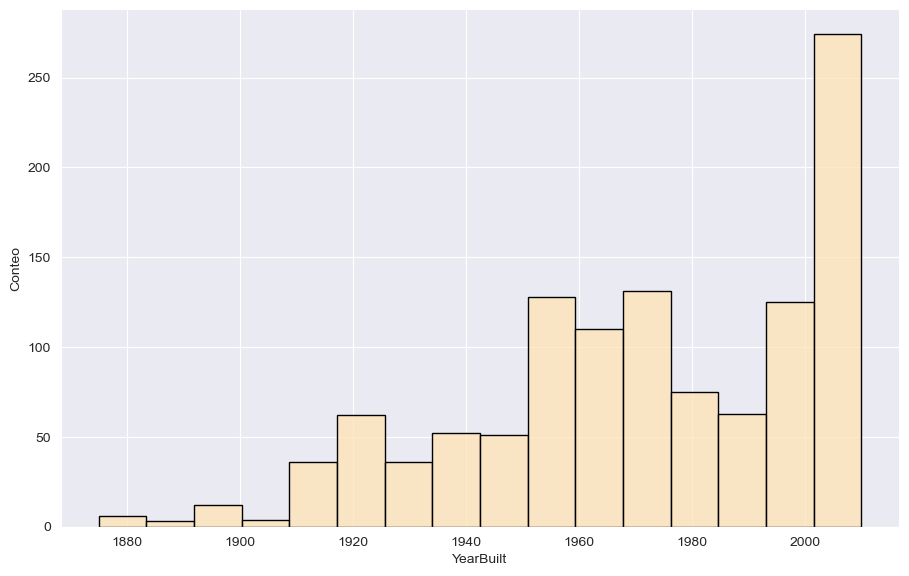

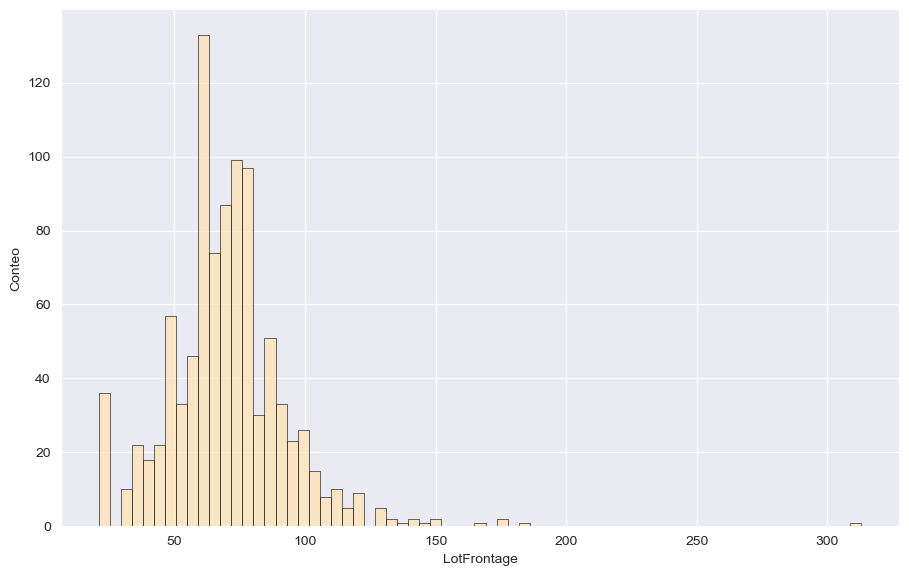

In [18]:
# Quitamos las advertencias, pues es solo ajustes de tamaño
warnings.filterwarnings('ignore', category=UserWarning)

for i in Set_Entrenamiento.columns.values:
    ax = sns.displot(Set_Entrenamiento[i], edgecolor='k', color="#FFE4B5")
    plt.xlabel(i)
    plt.ylabel('Conteo')
    plt.gcf().set_size_inches(10, 6)  #  tamanio de la figura (ancho, alto)
    plt.show()


# Para cada variable independiente x

- Calcular el coeficiente de correlación entre x y y.
- Graficar x vs y(scatterplot) usando matplotlib.
- Colocar el coeficiente de correlación y colocarlo como parte del título de la gráfica.
- Basado en la gráfica y el coeficiente de correlación de cada par x,y elegir las 2 variables 
con más potencial predictivo es decir las 2 variables que presentan mayor correlación
entre dicha variable y la variable dependiente

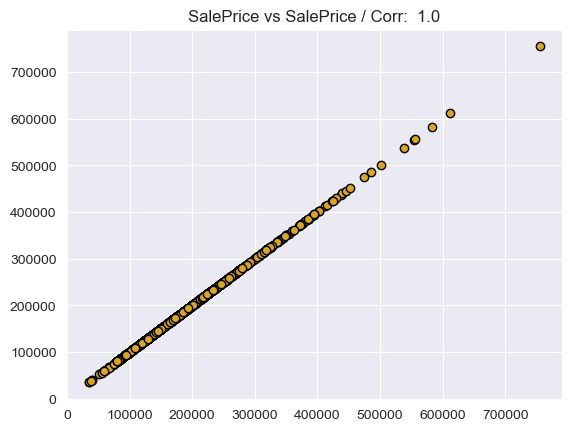

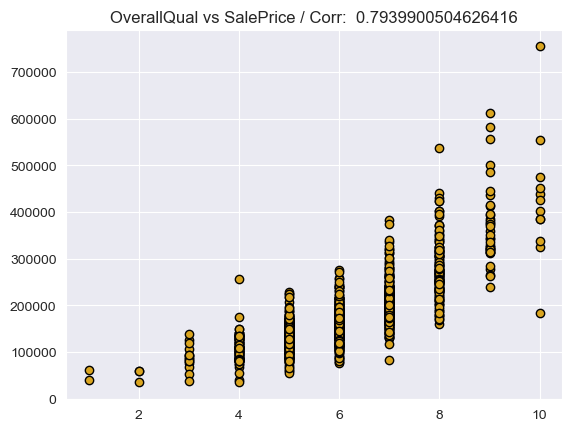

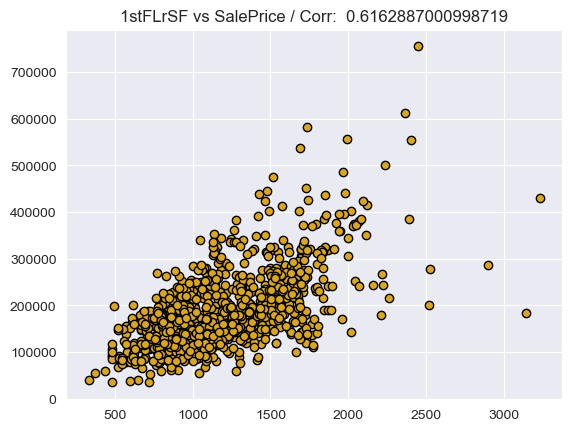

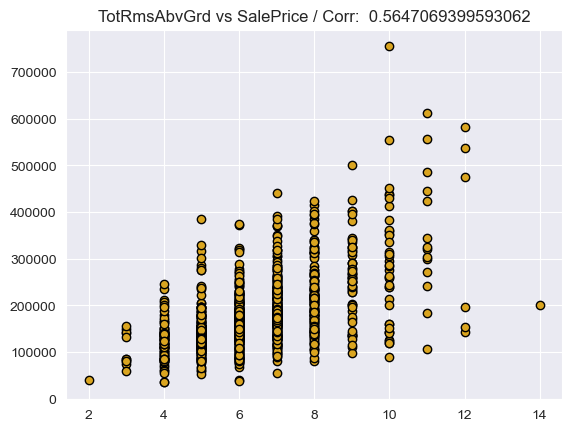

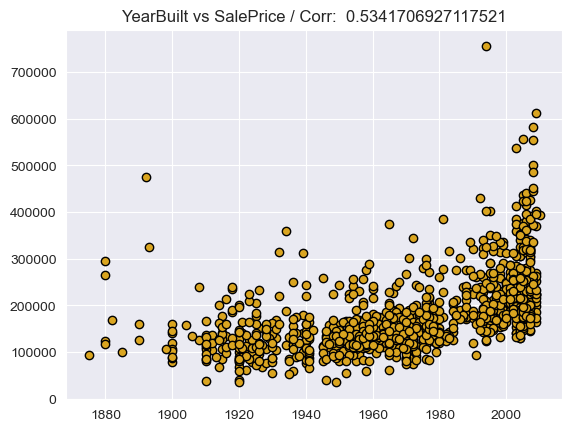

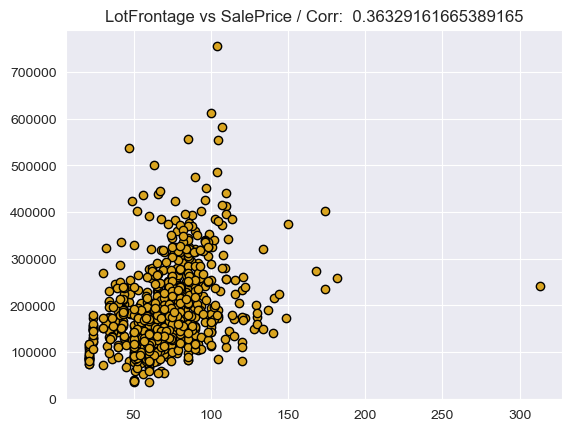

In [19]:
Correlaciones = []
variables = []
for i in Set_Entrenamiento.columns.values:
    Correlacion = (pd.DataFrame(Set_Entrenamiento[[i,'SalePrice']]).corr().iloc[0,1])
    Correlaciones.append(Correlacion)
    variables.append(i)
    plt.scatter(Set_Entrenamiento[i], Set_Entrenamiento['SalePrice'], edgecolor='k', color="#DAA520")
    plt.title(str(i)+' vs ' + str('SalePrice') + ' / Corr:  '+str((Correlacion)))
    plt.show()

In [20]:
top_corr_variables = pd.DataFrame({'variables':variables, 
                                   'Correlaciones':Correlaciones})
top_corr_variables.sort_values(by='Correlaciones', ascending = False)[1:3]

,variables,Correlaciones
1,OverallQual,0.793990
2,1stFLrSF,0.616289


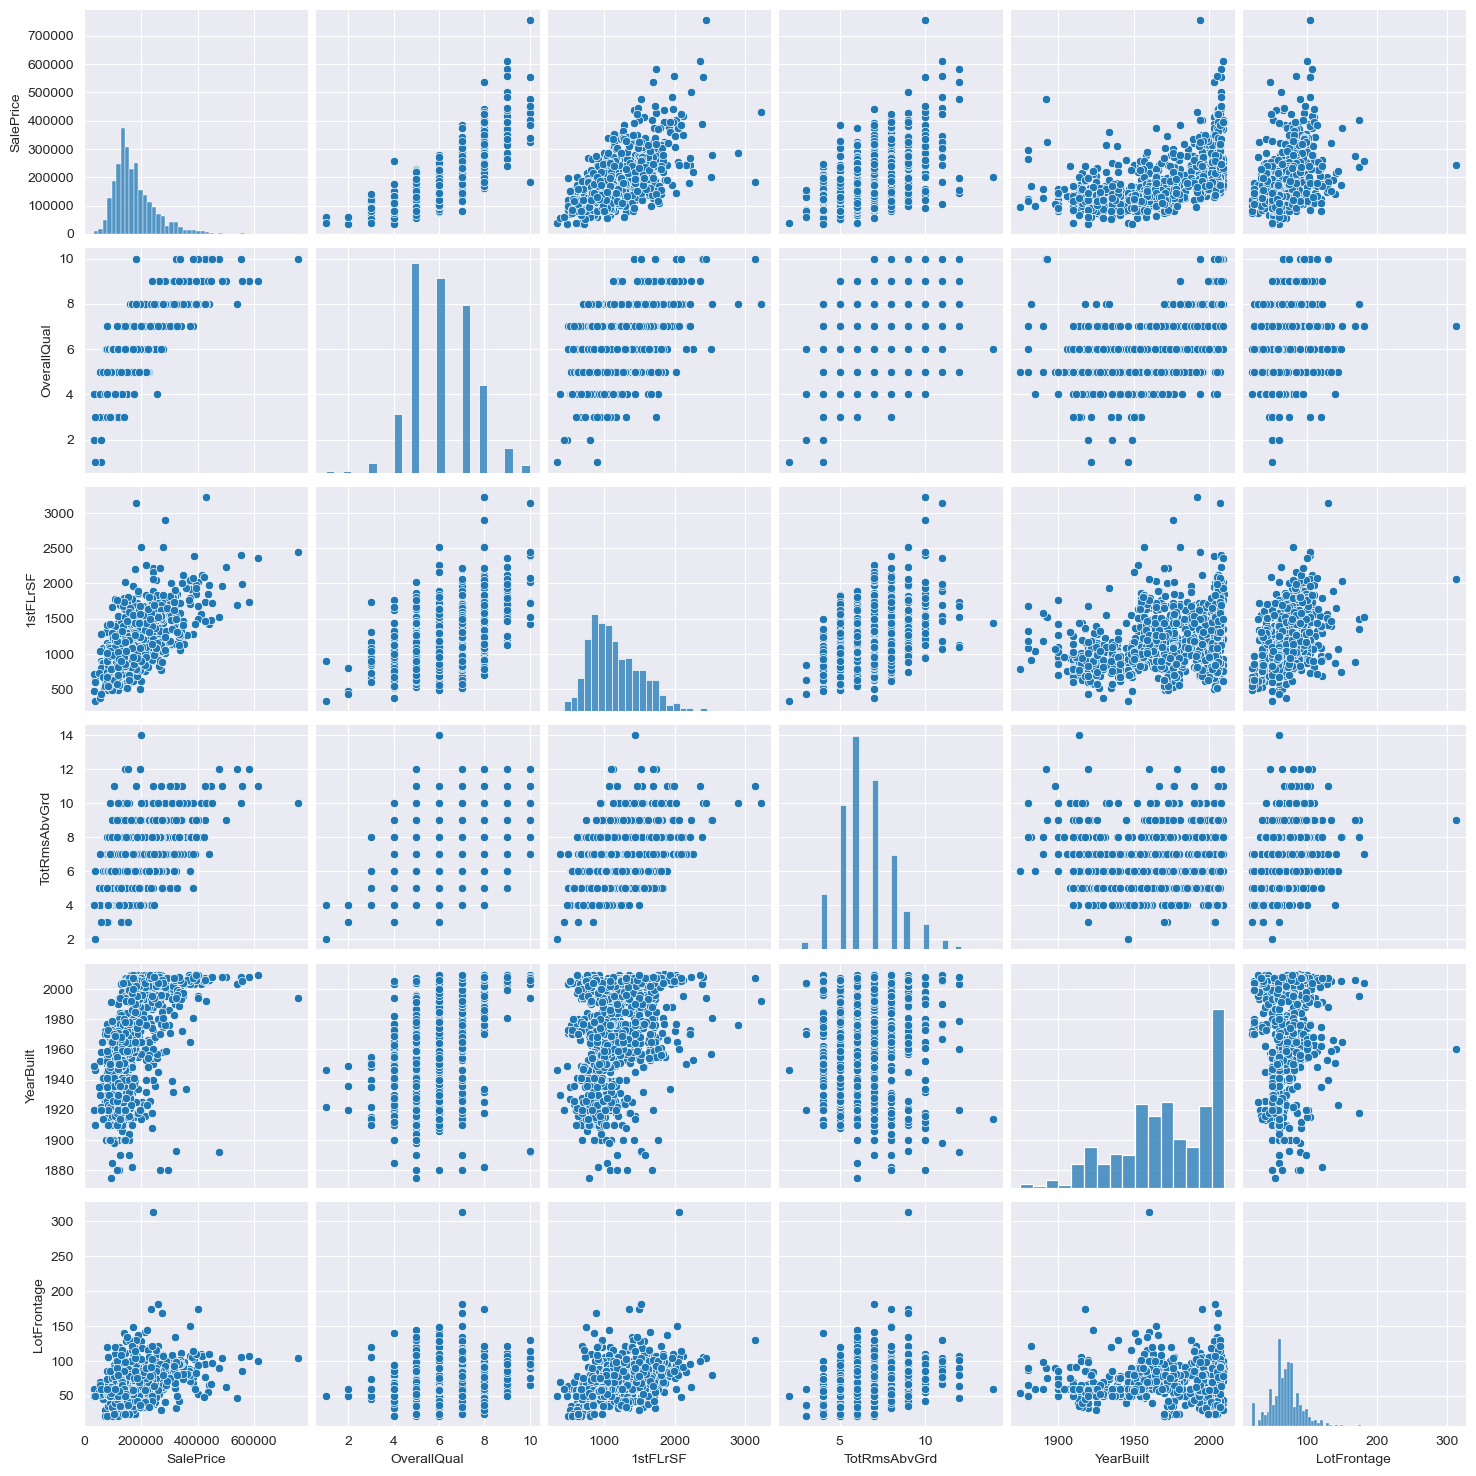

In [22]:
sns.pairplot(Set_Entrenamiento)

In [23]:
Mejor_Potencial = pd.DataFrame({'Correlaciones':Correlaciones},index=[Set_Entrenamiento.columns.values])
Mejor_Potencial

,Correlaciones
SalePrice,1.000000
OverallQual,0.793990
1stFLrSF,0.616289
TotRmsAbvGrd,0.564707
YearBuilt,0.534171
LotFrontage,0.363292


# Crear una función para entrenar un modelo de Regresion Lineal

    6.1 Vector con la variable independiente x,
    6.2 Vector con la variable dependiente y,
    6.3 un entero epochs que indica por cuantas iteraciones entrenar el modelo.
    6.4 un entero imprimir error cada , que nos indica cada cuantas iteraciones queremos imprimir a través de print: el nu´mero de iteración, el error del modelo en esa iteración, si imprimir error cada = 10, se despliega en pantalla el error en las iteraciones: 10,20,30,40,50.
    6.5 escalar α(learning rate): es usado como parte de la expresión matemática para actualizar en cada iteración los parámetros del modelo

In [68]:
class _regresion:
    def __init__(self, x, y, epochs, imprimir_error_cada, learning_rate):
        self.x = np.reshape(x, (-1, 1))
        self.y = np.reshape(y, (-1, 1))
        self.epochs = epochs
        self.imprimir_error_cada = imprimir_error_cada
        self.learning_rate = learning_rate
        self.betas = np.zeros((2, 1))
        self.error = []
        self.modelo = {}

        self.entrenar()

    def entrenar(self):
        X = np.hstack([self.x, np.ones_like(self.x)])
        for i in range(self.epochs):
            y_pred = X @ self.betas
            error = 1 / (2 * len(self.y)) * np.sum((self.y - y_pred) ** 2)
            self.error.append(error)
            if i % self.imprimir_error_cada == 0:
                print(f'Iteraciones: {i}, Error: {error}')
                self.modelo[i] = (self.betas.copy(), y_pred.copy())
            gradiente = self.learning_rate / len(self.y) * X.T @ (y_pred - self.y)
            self.betas -= gradiente

    @staticmethod
    def graficar_error(error):
        plt.figure(figsize=(9, 7))
        plt.plot(error, color="#ADD8E6")
        plt.title("Errores del modelo")
        plt.xlabel("Número de Iteraciones")
        plt.ylabel("Error")
        plt.show()

    @staticmethod
    def evolucion(modelo, x, y, n):
        for i, (betas, y_pred) in modelo.items():
            if i % n == 0:
                plt.figure(figsize=(9, 7))
                plt.scatter(x, y, edgecolor='k', color="#8A2BE2")
                plt.plot(x, y_pred, linestyle='solid', color='r', label=f'Iteración: {i}')
                plt.title(f"Iteración: {i}")
                plt.legend()
                plt.xlabel("X")
                plt.ylabel("Y")
                plt.show()

    def prediccion(self, X):
        X = np.hstack([np.reshape(X, (-1, 1)), np.ones((len(X), 1))])
        return X @ self.betas

    @staticmethod
    def compara_prediccion(m_propio, m_sklearn, X, y):
        y_propio = m_propio.prediccion(X)
        y_sklearn = m_sklearn.predict(np.reshape(X, (-1, 1)))
        promedio = (y_propio + y_sklearn) / 2

        plt.figure(figsize=(9, 7))
        plt.scatter(X, y, edgecolor='k', color="#FAEBD7")
        plt.plot(X, y_propio, color="#FFEBCD", label='_regresion')
        plt.plot(X, y_sklearn, color="#FFFACD", label='Msklearn')
        plt.plot(X, promedio, color="orange", label='Promedio')
        plt.title("Comparativa")
        plt.legend()
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.show()

        return y_propio, y_sklearn, promedio


    @staticmethod
    def compara_errores(modelos, modelos2, y_test1, y_test2):
        labels = ['OverallQual', '1stFlrSF']
        errores = [
            mean_squared_error(y_test1, modelos[0]),
            mean_squared_error(y_test2, modelos2[0])
        ]
        errores2 = [
            mean_squared_error(y_test1, modelos[1]),
            mean_squared_error(y_test2, modelos2[1])
        ]
        errores_promedio = [
            mean_squared_error(y_test1, modelos[2]),
            mean_squared_error(y_test2, modelos2[2])
        ]

        plt.figure(figsize=(9, 7))
        x = np.arange(len(labels))
        width = 0.30
        plt.bar(x - width, errores, width, label='_regresion', color="#708090")
        plt.bar(x, errores2, width, label='Msklearn', color="#E6E6FA")
        plt.bar(x + width, errores_promedio, width, label='Promedio', color="#F0FFF0")
        plt.xticks(x, labels)
        plt.ylabel('Error cuadrático medio')
        plt.title('Comparación de Errores')
        plt.legend()
        plt.show()

## Entrenando modelos de regresión - con OverallQual

Iteraciones: 0, Error: 19409722053.221745
Iteraciones: 1000, Error: 1243042203.6766474
Iteraciones: 2000, Error: 1184197385.7979727
Iteraciones: 3000, Error: 1161375216.9390619
Iteraciones: 4000, Error: 1152523946.594432
Iteraciones: 5000, Error: 1149091100.7856898


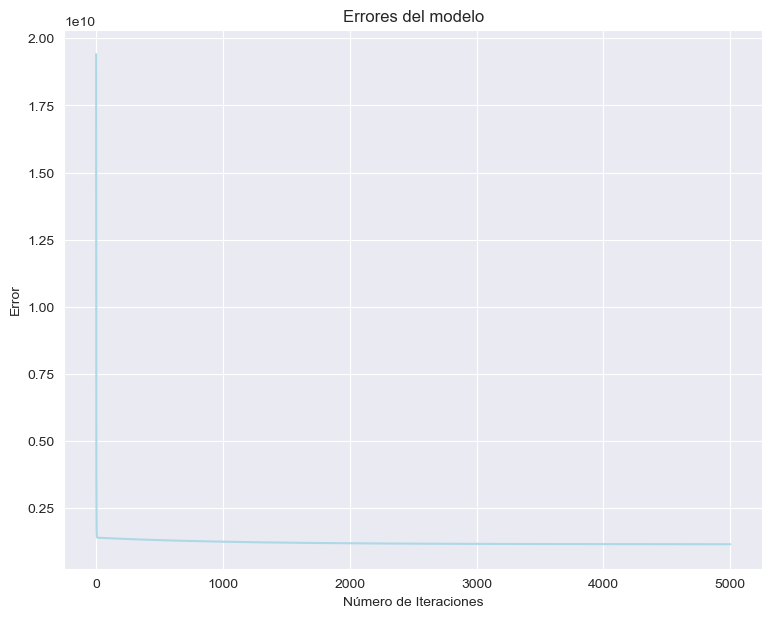

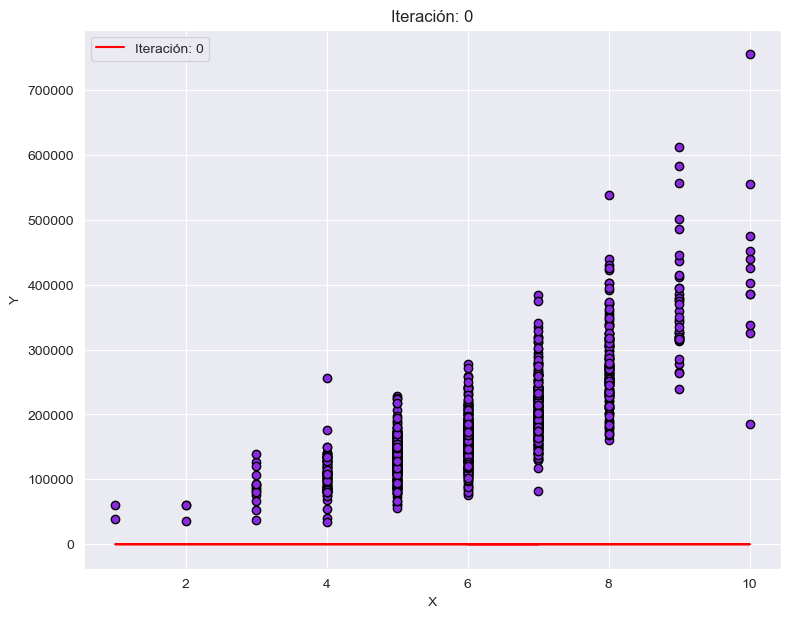

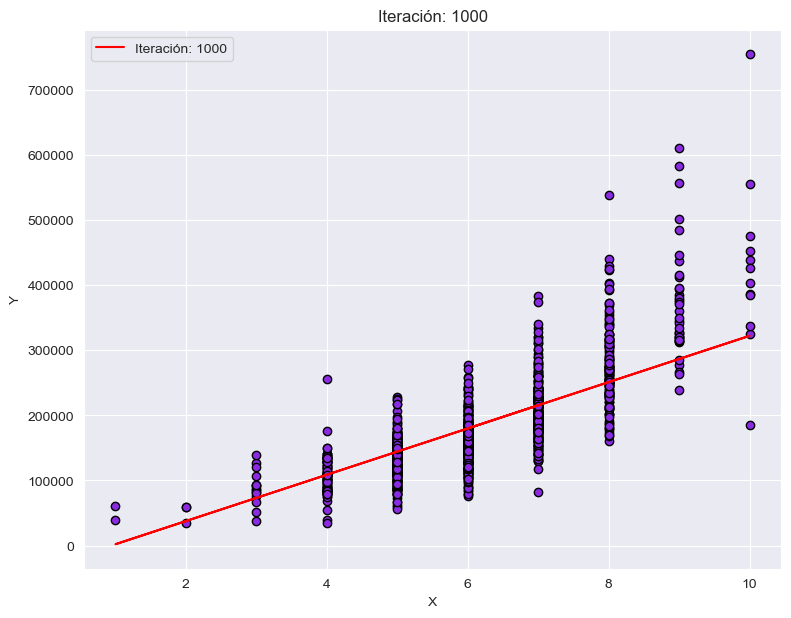

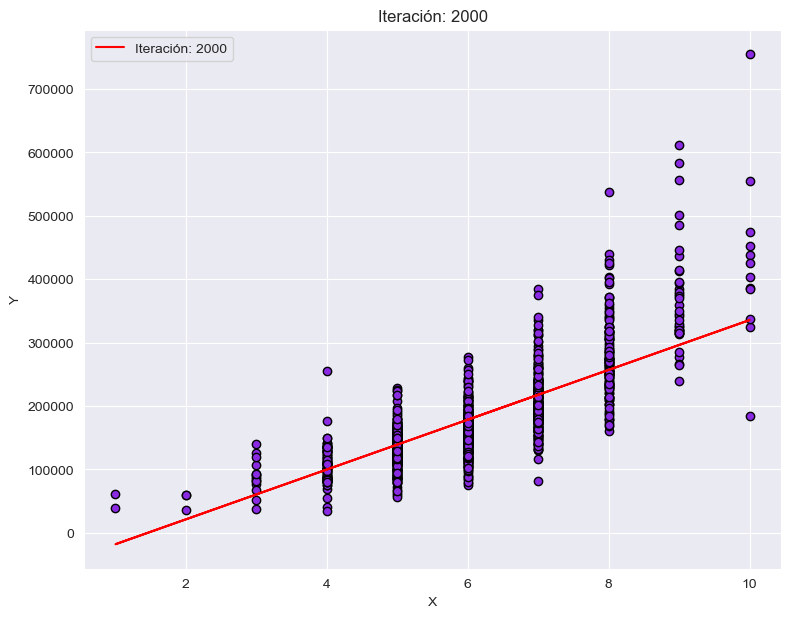

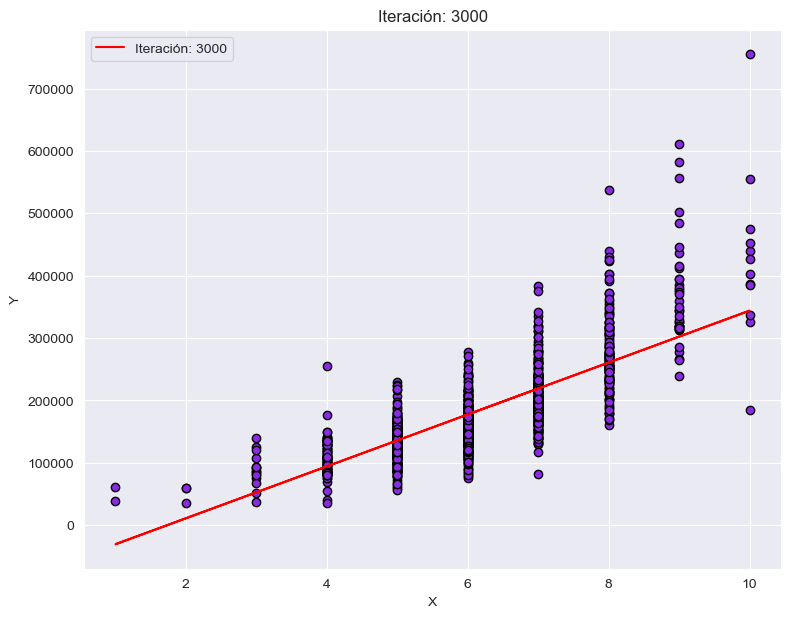

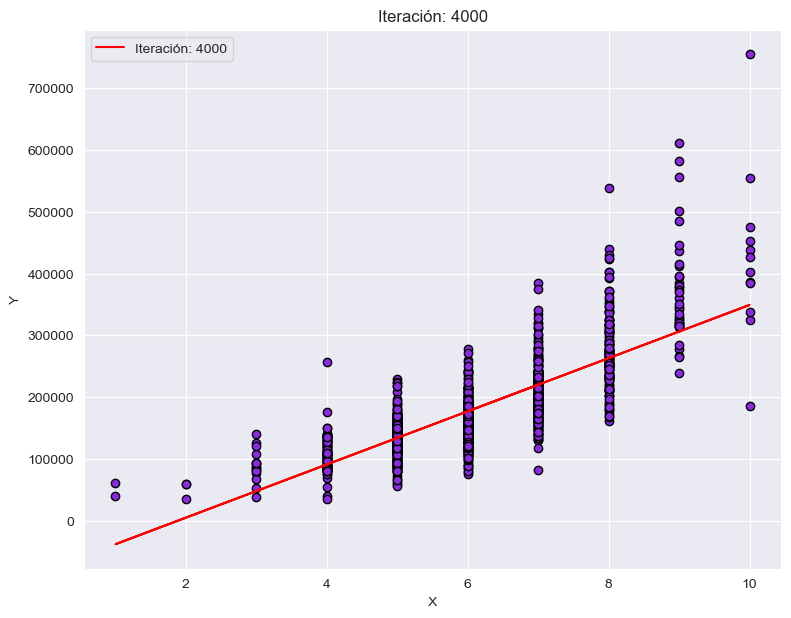

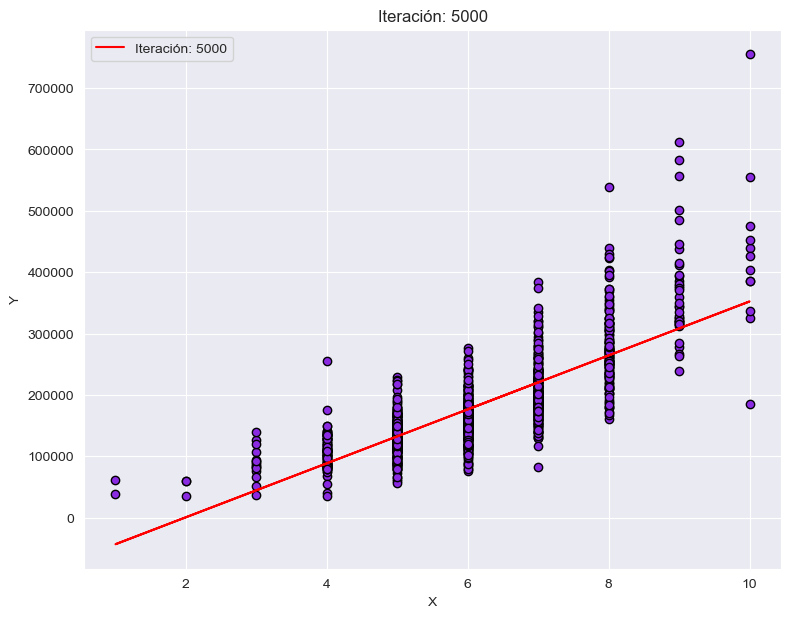

In [69]:
NPSales = np.reshape(np.array(Set_Entrenamiento['SalePrice']), (-1, 1))
NPOverallQual = np.reshape(np.array(Set_Entrenamiento['OverallQual']), (-1, 1))
NPFirst_Floor_square_feet = np.reshape(np.array(Set_Entrenamiento['1stFLrSF']), (-1, 1))
Epoch = 5001
Imprimir = 1000
Escalar = 0.01
RegresionModelo1 = _regresion(NPOverallQual, NPSales, Epoch, Imprimir, Escalar)
Rmodelos = RegresionModelo1.modelo  # Acceder al atributo directamente
Rerrores = RegresionModelo1.error   # Acceder al atributo directamente
_regresion.graficar_error(Rerrores)  # Usar el método estático graficar_error
_regresion.evolucion(Rmodelos, NPOverallQual, NPSales, Imprimir)  # Usar el método estático evolucion


## Entrenando modelos de regresión - con 1stFlrSF

Iteraciones: 0, Error: 19409722053.221745
Iteraciones: 10, Error: 2682203837.751268
Iteraciones: 20, Error: 1997330831.0274532
Iteraciones: 30, Error: 1969290140.4881184
Iteraciones: 40, Error: 1968142065.5972984
Iteraciones: 50, Error: 1968095052.2081733


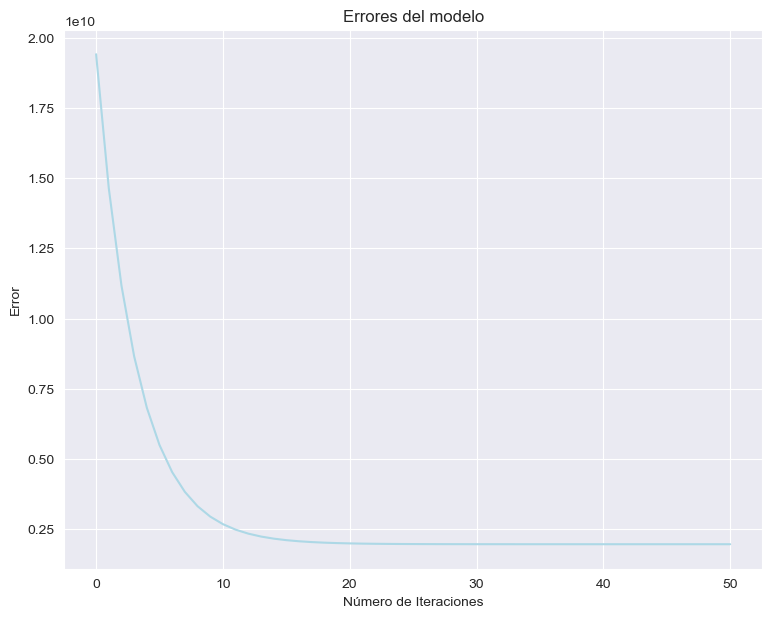

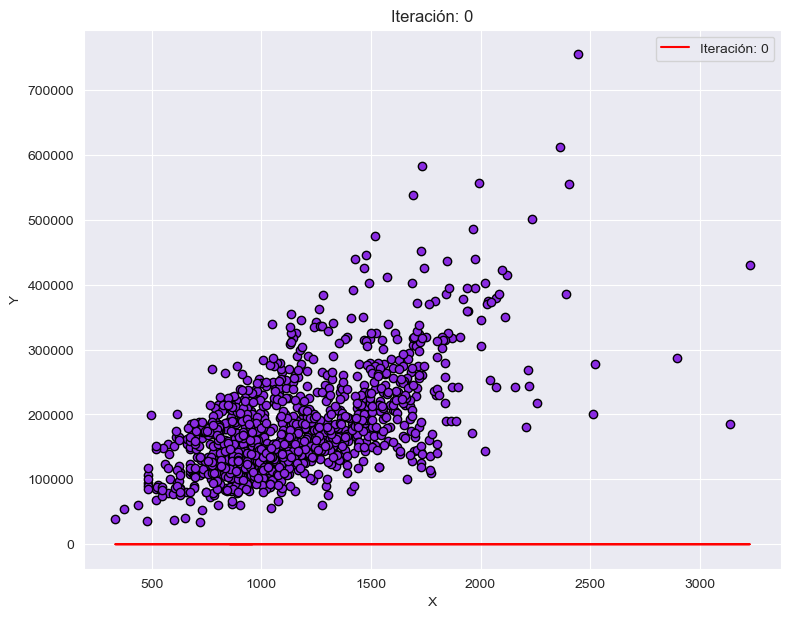

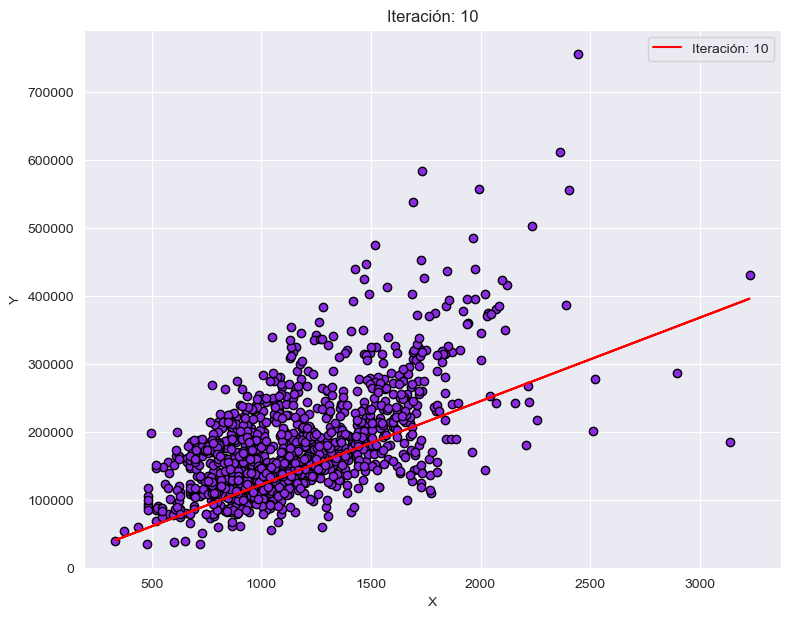

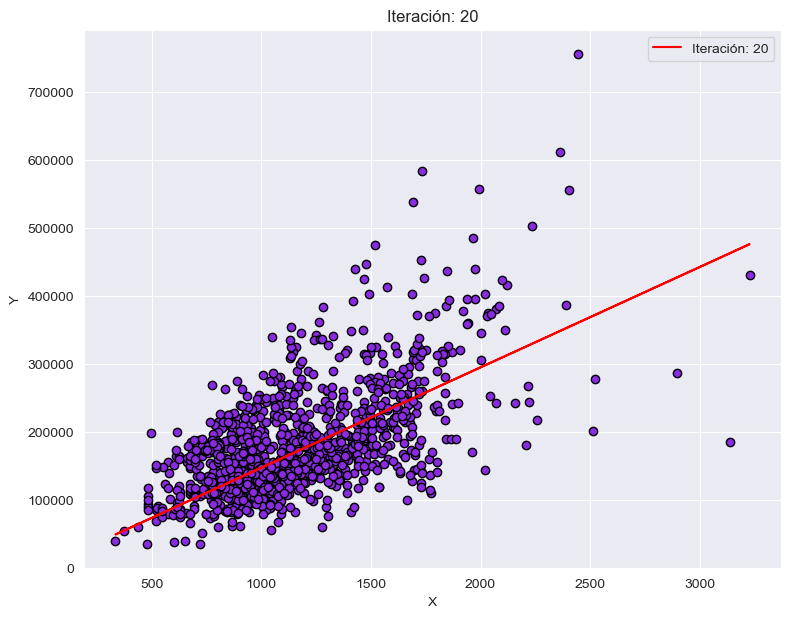

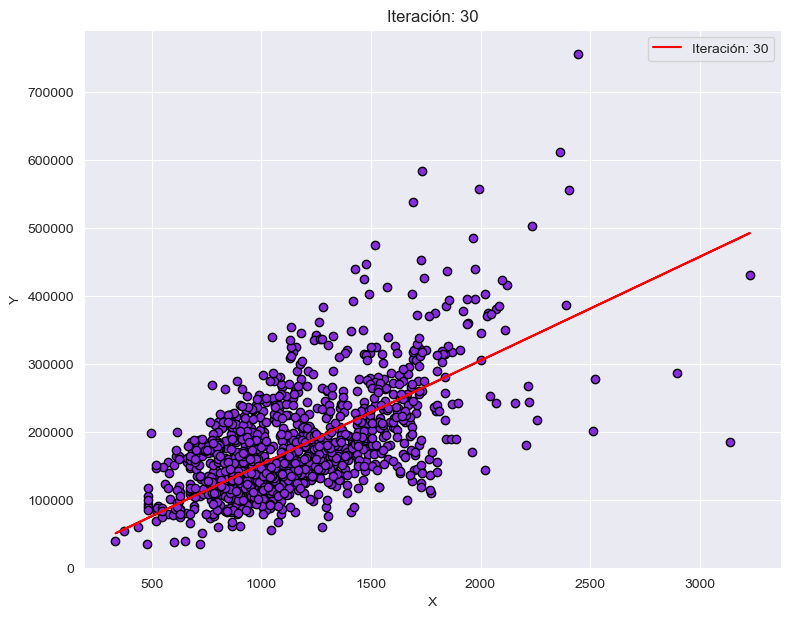

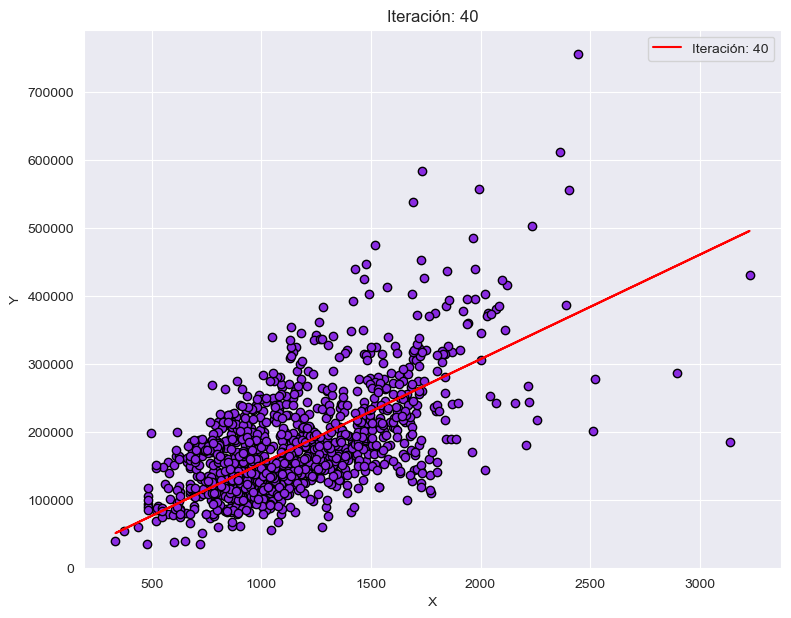

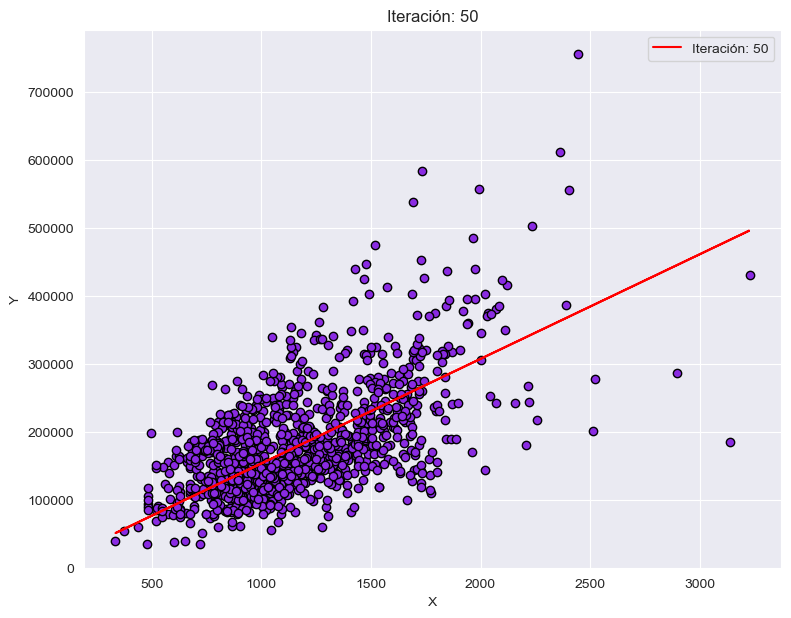

In [70]:
Epoch = 51
Imprimir = 10
Escalar = 0.0000001
RegresionModelo2 = _regresion(NPFirst_Floor_square_feet, NPSales, Epoch, Imprimir, Escalar)
Rmodelos2 = RegresionModelo2.modelo  # Acceder al atributo directamente
Rerrores2 = RegresionModelo2.error   # Acceder al atributo directamente
_regresion.graficar_error(Rerrores2)  # Usar el método estático graficar_error
_regresion.evolucion(Rmodelos2, NPFirst_Floor_square_feet, NPSales, Imprimir)  # Usar el método estático evolucion


## Predicciones modelo propio vs SK-Learn

In [71]:
Sci_NPOverallQual = LinearRegression()
Sci_NPOverallQual.fit(NPOverallQual, NPSales)
Sci_NPFirst_Floor_square_feet = LinearRegression()
Sci_NPFirst_Floor_square_feet.fit(NPFirst_Floor_square_feet, NPSales)

LinearRegression()

## Predicciones con modelo propio, Scikit Learn y Promedio

In [72]:
Pruebas_OverallQual = np.reshape(np.array(Set_Pruebas['OverallQual']), (-1, 1))
Pruebas_Floor_square_feet = np.reshape(np.array(Set_Pruebas['1stFLrSF']), (-1, 1))


## Comparando modelos
    Modelo 1 - Modelo Propio
    Modelo 2 - Modelo Scikit Learn
    Modelo 3 - Modelo Promedio

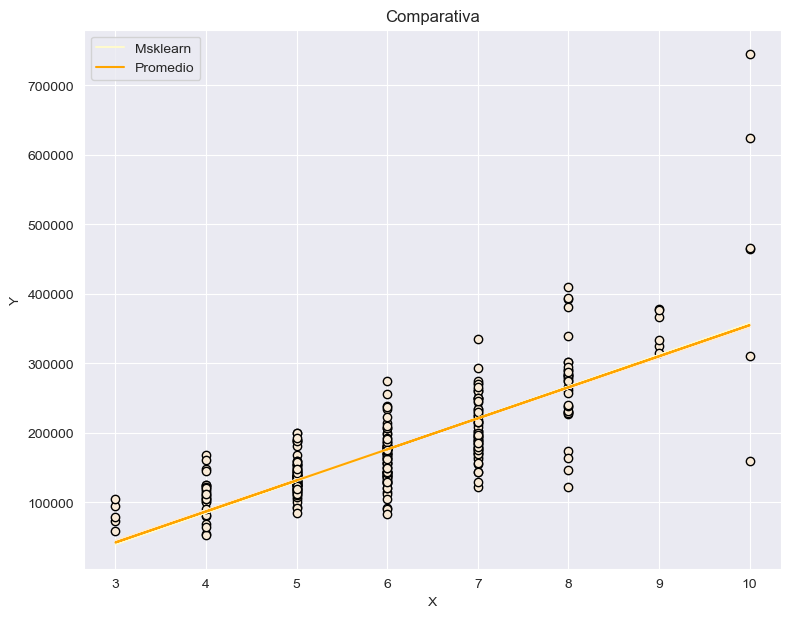

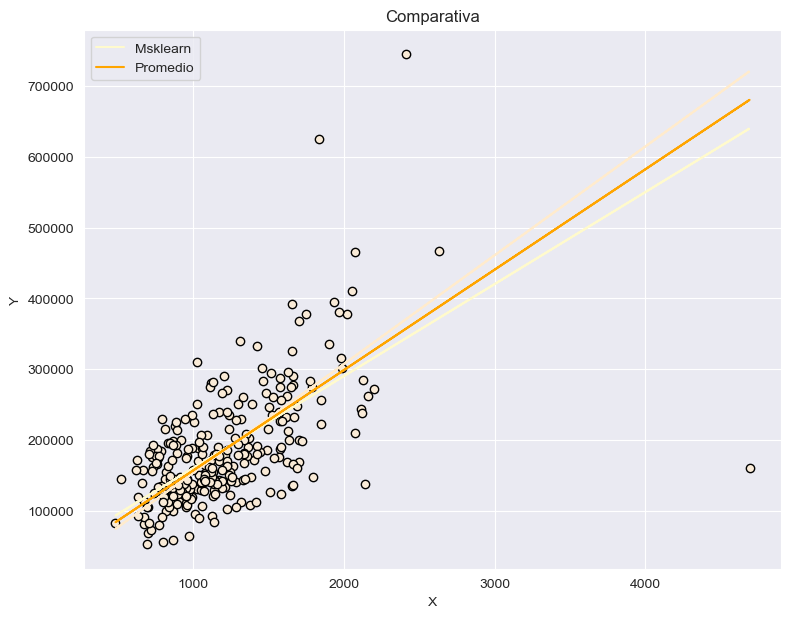

In [73]:
# Asumiendo que 'SalePrice' es la columna objetivo en Set_Pruebas
y_pruebas = Set_Pruebas['SalePrice'].values

# Asegúrate de que Pruebas_OverallQual y Pruebas_Floor_square_feet tienen el mismo número de filas que y_pruebas
modelos_OverallQual = _regresion.compara_prediccion(RegresionModelo1, Sci_NPOverallQual, Pruebas_OverallQual, y_pruebas)
modelos_1stFlrSF = _regresion.compara_prediccion(RegresionModelo2, Sci_NPFirst_Floor_square_feet, Pruebas_Floor_square_feet, y_pruebas)


## Comparativa de errores de modelos

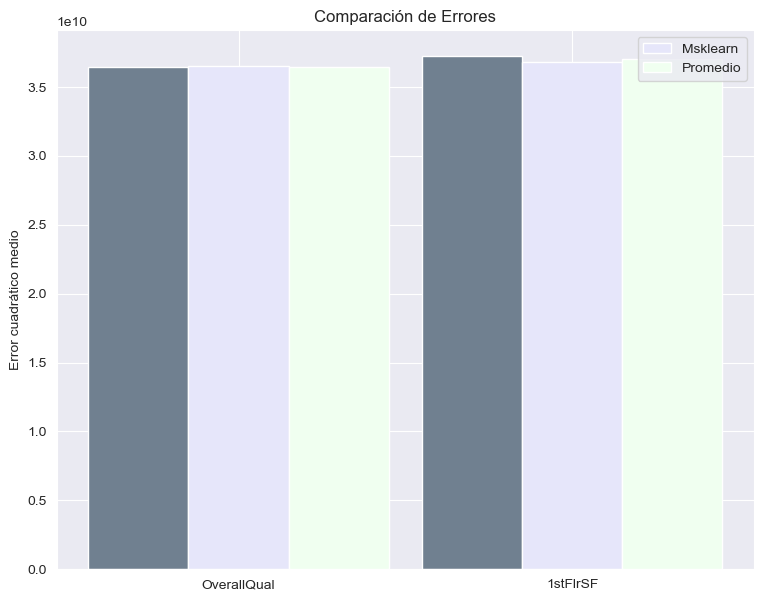

In [74]:

_regresion.compara_errores(modelos_OverallQual, modelos_1stFlrSF, Pruebas_OverallQual, Pruebas_Floor_square_feet)


## Conclusiones

- OverallQual: todos los modelos presentan un error muy similar, aproximadamente el 20% de los datos. Sin embargo, la regresión específicamente desarrollada para esta tarea resulta ser el modelo con el menor error. 
- 1stFlrSF: el modelo de regresión de scikit-learn sobresale como el mejor, mostrando un error significativamente menor en comparación con el modelo generado para esta tarea.